In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# BBAS3.SA

# BBDC4.SA
# ticker = "SPY"
ticker = "VALE3.SA"
# ticker2 = "ITUB4.SA"
# ticker2 = "BBAS3.SA"
ticker2 = "^BVSP"

data = yf.download(ticker, start="2011-01-01", end="2023-10-10")
data2 = yf.download(ticker2,  start="2011-01-01", end="2023-10-10")

# data = yf.download(ticker, start="2010-01-01", end="2022-04-22")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
# data = data.reindex(data2.index)
# data['Adj Close'] = data2['Adj Close'] / data['Adj Close']
# plt.plot(data['Adj Close'])

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3172 entries, 2011-01-03 to 2023-10-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3172 non-null   float64
 1   High       3172 non-null   float64
 2   Low        3172 non-null   float64
 3   Close      3172 non-null   float64
 4   Adj Close  3172 non-null   float64
 5   Volume     3172 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 173.5 KB
None


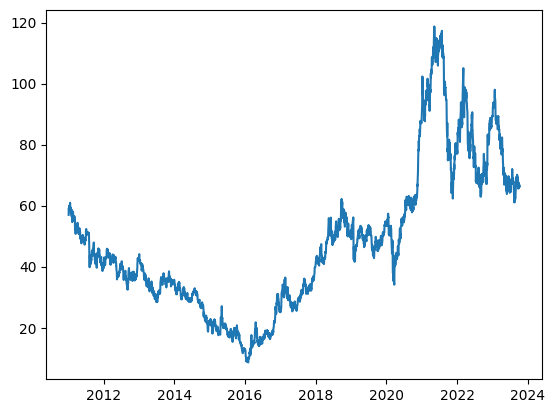

In [4]:
print(data.info())
plt.plot(data['Close'])

                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2011-01-03  56.299999  57.490002  56.029999  56.970001  27.773321  5107800   
2011-01-04  57.500000  58.259998  57.480000  58.150002  28.348581  4104200   
2011-01-05  57.709999  59.270000  57.700001  59.200001  28.860458  3288400   
2011-01-06  59.150002  59.540001  58.439999  58.439999  28.489956  2986900   
2011-01-07  58.540001  58.700001  57.520000  58.000000  28.275455  2775200   

            daily_return state  
Date                            
2011-01-03           NaN  down  
2011-01-04      0.020713    up  
2011-01-05      0.018057    up  
2011-01-06     -0.012838  down  
2011-01-07     -0.007529  down  


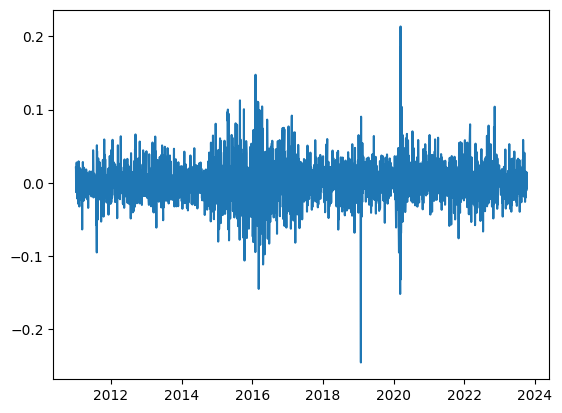

In [5]:
data["daily_return"] = data["Adj Close"].pct_change()
data["state"] = np.where(data["daily_return"] >= 0, "up", "down")
print(data.head(5))
plt.plot(data['daily_return'])

In [6]:
up_counts = len(data[data["state"] == "up"])
down_counts = len(data[data["state"] == "down"])
up_to_up = len(data[(data["state"] == "up") & (data["state"].shift(-1)=="up") ]) / len(data.query('state=="up"'))
down_to_up = len(data[(data["state"] == "up") & (data["state"].shift(-1)=="down") ]) / len(data.query('state=="up"'))
up_to_down = len(data[(data["state"] == "down") & (data["state"].shift(-1)=="up") ]) / len(data.query('state=="down"'))
down_to_down = len(data[(data["state"] == "down") & (data["state"].shift(-1)=="down") ]) / len(data.query('state=="down"'))
transition_matrix = pd.DataFrame({
    "up": [up_to_up, up_to_down],
    "down": [down_to_up, down_to_down]
}, index=["up", "down"])

print(transition_matrix)

            up      down
up    0.509598  0.490402
down  0.508671  0.490687


In [7]:
print('\n',len(data[(data["state"]=="up") & (data["state"].shift(-1)=="down") & (data["state"].shift(-2)=="down")]))
print(round(len(data[(data["state"]=="up") & (data["state"].shift(-1)=="down") & (data["state"].shift(-2)=="down")]) / len(data[(data["state"].shift(1)=="down") & (data["state"].shift(2)=="down")]),2))

print('\n',len(data[(data["state"]=="up") & (data["state"].shift(-1)=="down") & (data["state"].shift(-2)=="down")  & (data["state"].shift(-3)=="down")]))
print(round(len(data[(data["state"]=="up") & (data["state"].shift(-1)=="down") & (data["state"].shift(-2)=="down") & (data["state"].shift(-3)=="down")]) / len(data[(data["state"].shift(1)=="down") & (data["state"].shift(2)=="down") & (data["state"].shift(3)=="down")]),2))

print('\n',len(data[(data["state"]=="up") & (data["state"].shift(-1)=="down") & (data["state"].shift(-2)=="down")  & (data["state"].shift(-3)=="down") & (data["state"].shift(-4)=="down")]))
print(round(len(data[(data["state"]=="up") & (data["state"].shift(-1)=="down") & (data["state"].shift(-2)=="down") & (data["state"].shift(-3)=="down") & (data["state"].shift(-4)=="down")]) / len(data[(data["state"].shift(1)=="down") & (data["state"].shift(2)=="down") & (data["state"].shift(3)=="down") & (data["state"].shift(4)=="down")]),2))

print('\n',len(data[(data["state"]=="up") & (data["state"].shift(-1)=="down") & (data["state"].shift(-2)=="down")  & (data["state"].shift(-3)=="down") & (data["state"].shift(-4)=="down") & (data["state"].shift(-5)=="down")]))
print(round(len(data[(data["state"]=="up") & (data["state"].shift(-1)=="down") & (data["state"].shift(-2)=="down") & (data["state"].shift(-3)=="down") & (data["state"].shift(-4)=="down") & (data["state"].shift(-5)=="down")]) / len(data[(data["state"].shift(1)=="down") & (data["state"].shift(2)=="down") & (data["state"].shift(3)=="down") & (data["state"].shift(4)=="down") & (data["state"].shift(5)=="down")]),2))


 408
0.53

 183
0.51

 89
0.51

 49
0.58


In [8]:
# estatuto social, socio responsavel representante (cnh e comprovante de residencia)
# documentos - ACOES 

